# K -Nearest Neighbor (k-NN)

k-NN is a supervised learning algorithm where the result of new instance query is classified based on majority of its K nearest neighbors. The algorithm do not use any model to fit and only based on memory thus, is a lazy algorithm.

### Simple Case

Let’s take a simple case to understand this algorithm. 
Following is a spread of red circles (RC) and green squares (GS) :

***

![knn1](images/09-knn1.png)

***

- You intend to find out the class of the blue star (BS). 

- BS can either be RC or GS and nothing else. 

- The “K” is KNN algorithm is the nearest neighbors we wish to take vote from. 

- Let’s say K = 3. Hence, we will now make a circle with BS as center just as big as to enclose only three datapoints on the plane. 

Refer to following diagram for more details:

*****

![knn1](images/09-knn2.png)

### How does the k-NN algorithm work?

In the classification setting, the K-nearest neighbor algorithm essentially boils down to forming a majority vote between the K most similar instances to a given “unseen” observation. Similarity is defined according to a distance metric between two data points. A popular choice is the Euclidean distance given by;

$$d(x, x') = \sqrt{\left(x_1 - x'_1 \right)^2 + \left(x_2 - x'_2 \right)^2 + \dotsc + \left(x_n - x'_n \right)^2}$$

More formally, given a positive integer K, an unseen observation $x$ and a similarity metric $d$, KNN classifier performs the following steps:

***

• Step 1: The algorithm runs through the whole dataset computing $d$ between $x$ and each training observation. We’ll call the K points in the training data that are closest to $x$ the set $A$. Note that K is usually odd to prevent tie situations.

• Step 2: It then estimates the conditional probability for each class, that is, the fraction of points in $A$ with that given class label. (Note $I(x)$ is the indicator function which evaluates to $1$ when the argument $x$ is true and $0$ otherwise)

$$P(y = j | X = x) = \frac{1}{K} \sum_{i \in \mathcal{A}} I(y^{(i)} = j) $$

Finally, our input $x$ gets assigned to the class with the largest probability.

***

### Example with K-NN Classifier on Iris Data Set

### Import Libraries

In [1]:
import warnings; warnings.simplefilter('ignore')

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from IPython.display import Image



### Load Iris Flower Dataset

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Plot Data Set

Automatically created module for IPython interactive environment


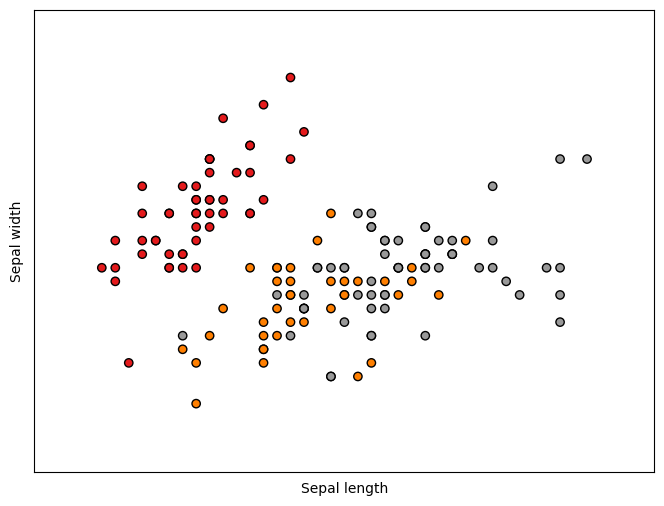

<Figure size 800x600 with 0 Axes>

In [4]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Distance Metrics

To measure the distance between given points in a feature space, various distance functions have been used in the literature:

![knn_euc](images/09-knn_formul.png)

### How to Decide Which Distance Metric to Use? 


- The distance metric should be appropriate for the features in the dataset. 


- There are no 'best' distance metrics, which makes it a hyper-parameter to determine.


#### Euclidean vs Manhattan distance

![knn_manhattan](images/09-manhattan.jpg)

### Standardize Features

It is important to standardize the data so that each feature contributes equally to the distance.

In [5]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))



### How to choose K ?

* When "k" is a very small number KNN can overfit, it will classify just based on the closest neighbors instead of learning a good separating frontier between classes. 

* But if "k" is a very big number KNN will underfit, in the limit if k=n KNN will think every point belongs to the class that has more samples.


* At this point, you’re probably wondering how to pick the variable K and what its effects are on your classifier. 


* Well, like most machine learning algorithms, the K in KNN is a hyperparameter that you, as a designer, must pick in order to get the best possible fit for the data set. 


* Intuitively, you can think of K as controlling the shape of the decision boundary we talked about earlier.


* When K is small, we are restraining the region of a given prediction and forcing our classifier to be “more blind” to the overall distribution. 


* A small value for K provides the most flexible fit, which will have low bias but high variance.


* You can see the difference when K = 1 and 20.

***


![knn_min](images/09-knn_k_effect.jpg)

![knn_min](images/09-1nearestneigh.png)

![knn_min](images/09-20nearestneigh.png)

<div class="alert alert-block alert-danger">

Lets do a k-NN exercise on iris data set and plot the results! 


1. Change the metrics of KNeighborsClassifier object and interpret the results with training score.
2. Interpret the results of k-nn classification through plotting decision regions.


####  KNeighborsClassifier object

In [6]:
k = 5

knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')

knn.fit(X_train_std, y_train)


KNeighborsClassifier()

#### KNeighborsClassifier training score

In [7]:
knn.score(X_train_std, y_train)

0.9523809523809523

####  KNeighborsClassifier decision regions

In [10]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1],
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


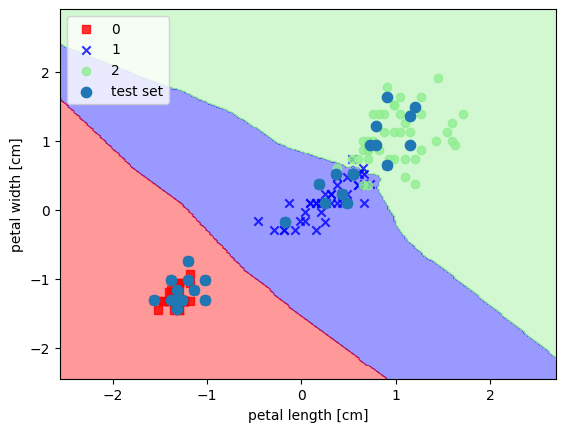

In [11]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(120,150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

plt.show()



<div class="alert alert-block alert-danger">

We obtain a relatively smooth decision boundary: